In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
#Import Data
df = pd.read_csv("listings.csv")
df.head()
df.info()

,id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,José,11/14/16,within an hour,83%,0%,f,3.0,t,t,...,$150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,47908784,Raquel,7/15/16,within a day,50%,100%,f,1.0,t,f,...,$450.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
2,52239613,Fabio,9/13/21,within a day,100%,89%,f,0.0,t,f,...,$350.00,5.00,5.00,5.00,4.89,4.78,4.78,4.89,f,1.16
3,10445855,Márcio,1/24/12,within an hour,100%,100%,f,2.0,t,t,...,$145.00,4.78,4.91,4.89,4.93,4.87,4.70,4.57,f,0.64
4,5.65E+17,Júlio,12/07/14,within an hour,100%,67%,f,0.0,t,t,...,$180.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24885 non-null  object 
 1   host_name                    24765 non-null  object 
 2   host_since                   24765 non-null  object 
 3   host_response_time           19664 non-null  object 
 4   host_response_rate           19664 non-null  object 
 5   host_acceptance_rate         20072 non-null  object 
 6   host_is_superhost            24764 non-null  object 
 7   host_total_listings_count    24764 non-null  float64
 8   host_has_profile_pic         24764 non-null  object 
 9   host_identity_verified       24764 non-null  object 
 10  neighbourhood_cleansed       24881 non-null  object 
 11  latitude                     24881 non-null  float64
 12  longitude                    24881 non-null  float64
 13  property_type   

In [10]:
#setting all NaN values to 0 for column - 'reviews_per_month'
df.fillna({'reviews_per_month':0, 'accommodates':0}, inplace=True)

#Changing Price to float values
df['price']=df['price'].replace('[\$\,]', '', regex=True).astype(float)

df['accommodates'] =df['accommodates'].astype(int)
df.info()

#replace other numeric columns with mean values / Imputing Mean values for other review columns
impute_df = df[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
impute_df = impute_df.fillna(impute_df.mean())
df.update(impute_df)

#updating 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24885 non-null  object 
 1   host_name                    24765 non-null  object 
 2   host_since                   24765 non-null  object 
 3   host_response_time           19664 non-null  object 
 4   host_response_rate           19664 non-null  object 
 5   host_acceptance_rate         20072 non-null  object 
 6   host_is_superhost            24764 non-null  object 
 7   host_total_listings_count    24764 non-null  float64
 8   host_has_profile_pic         24764 non-null  object 
 9   host_identity_verified       24764 non-null  object 
 10  neighbourhood_cleansed       24881 non-null  object 
 11  latitude                     24881 non-null  float64
 12  longitude                    24881 non-null  float64
 13  property_type   

,id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,José,11/14/16,within an hour,83%,0%,f,3.0,t,t,...,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
1,47908784,Raquel,7/15/16,within a day,50%,100%,f,1.0,t,f,...,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
2,52239613,Fabio,9/13/21,within a day,100%,89%,f,0.0,t,f,...,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,f,1.16
3,10445855,Márcio,1/24/12,within an hour,100%,100%,f,2.0,t,t,...,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,f,0.64
4,5.65E+17,Júlio,12/07/14,within an hour,100%,67%,f,0.0,t,t,...,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24885 non-null  object 
 1   host_name                    24765 non-null  object 
 2   host_since                   24765 non-null  object 
 3   host_response_time           19664 non-null  object 
 4   host_response_rate           19664 non-null  object 
 5   host_acceptance_rate         20072 non-null  object 
 6   host_is_superhost            24764 non-null  object 
 7   host_total_listings_count    24764 non-null  float64
 8   host_has_profile_pic         24764 non-null  object 
 9   host_identity_verified       24764 non-null  object 
 10  neighbourhood_cleansed       24881 non-null  object 
 11  latitude                     24881 non-null  float64
 12  longitude                    24881 non-null  float64
 13  property_type   

<AxesSubplot:xlabel='reviews_per_month'>

NameError: name 'plot' is not defined

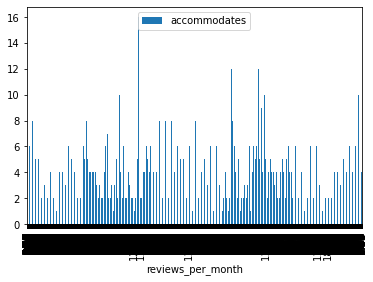

In [12]:
df.plot(x='reviews_per_month', y='accommodates', kind="bar")
plot.show()